In [4]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [5]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
## target_competencia = pd.read_csv('target_competencia.csv')
## RECIÉN VA A SER UTILIZADO EN EL TP2. (COLUMNAS obj_Sc Y obj_St SON 0)

In [3]:
################################################################
## EVENTS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
events= pd.read_csv('../../events.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (EVENTS)
events['wifi'] = events['wifi'].fillna(False).astype(bool)
events['connection_type'] = events['connection_type'].astype('category')
events['trans_id'] = events['trans_id'].astype('category')
events['date'] = pd.to_datetime(events['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
events['mes'] = events['date'].dt.month
events['dia'] = events['date'].dt.day
events['hora'] = events['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
events['nombre_dia'] = events['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
events.loc[events.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
events.loc[events.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
events.loc[events.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
events.loc[events.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
events.loc[events.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
events.loc[events.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
events.loc[events.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DdiasemanaE LOS MESES.
events['nombre_mes'] = ''
events.loc[events.mes == 1, 'nombre_mes'] = 'ENERO'
events.loc[events.mes == 2, 'nombre_mes'] = 'FEBRERO'
events.loc[events.mes == 3, 'nombre_mes'] = 'MARZO'
events.loc[events.mes == 4, 'nombre_mes'] = 'ABRIL'
events.loc[events.mes == 5, 'nombre_mes'] = 'MAYO'
events.loc[events.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
events['hora_madrugada'] = 0
events.loc[((events.hora > -1) & (events.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
events['hora_maniana'] = 0
events.loc[((events.hora > 6) & (events.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
events['hora_almuerzo'] = 0
events.loc[((events.hora > 11) & (events.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
events['hora_tarde'] = 0
events.loc[((events.hora > 13) & (events.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
events['hora_noche'] = 0
events.loc[((events.hora > 18) & (events.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
events['nombre_dia'] = events['nombre_dia'].astype('category')
events['nombre_mes'] = events['nombre_mes'].astype('category')
################################################################
################################################################

In [4]:
events['wifi'].value_counts()

False    1563521
True      930902
Name: wifi, dtype: int64

In [9]:
## GRAFICAMOS LA CONDICIÓN DE LOS PRODUCTOS SEGÚN LOS MESES DE OCURRENCIA.
#events_top5['application_id'].value_counts()
#7     947
#9     731
#10    389
#16    362
#8     328
aplicaciones_relevantes = list([7,9,10,16,8])
events_topAplicaciones_5 = events[events['application_id'].isin(aplicaciones_relevantes)]
events_topAplicaciones_5['application_id'].value_counts()

10    58311
7     48005
8     38972
16    24365
9      8198
Name: application_id, dtype: int64

In [10]:
# Los eventos principales para las 5 aplicaciones más instaladas.
events_top5 = events_topAplicaciones_5[( (events_topAplicaciones_5['event_id'] == 22) | (events_topAplicaciones_5['event_id'] == 80) | (events_topAplicaciones_5['event_id'] == 81) | (events_topAplicaciones_5['event_id'] == 1) | (events_topAplicaciones_5['event_id'] == 513) )]
events_top5['event_id'].value_counts()

22     77404
80     20081
81     16937
1      15443
513    12682
Name: event_id, dtype: int64

Text(0,0.5,'Cantidad de eventos')

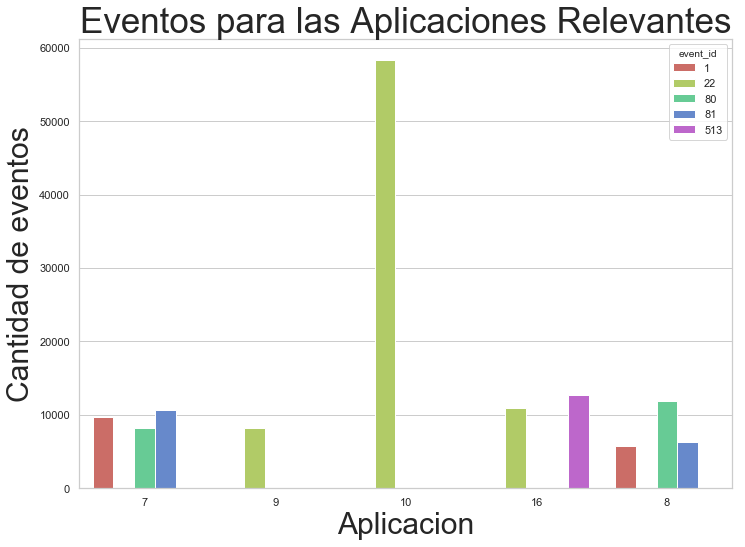

In [14]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="application_id", hue="event_id", data=events_top5, palette="hls", order=[7,9,10,16,8])
g.set_title("Eventos para las Aplicaciones Relevantes", fontsize=35)
g.set_xlabel("Aplicacion", fontsize=30)
g.set_ylabel("Cantidad de eventos", fontsize=30)

Text(0,0.5,'Cantidad de eventos')

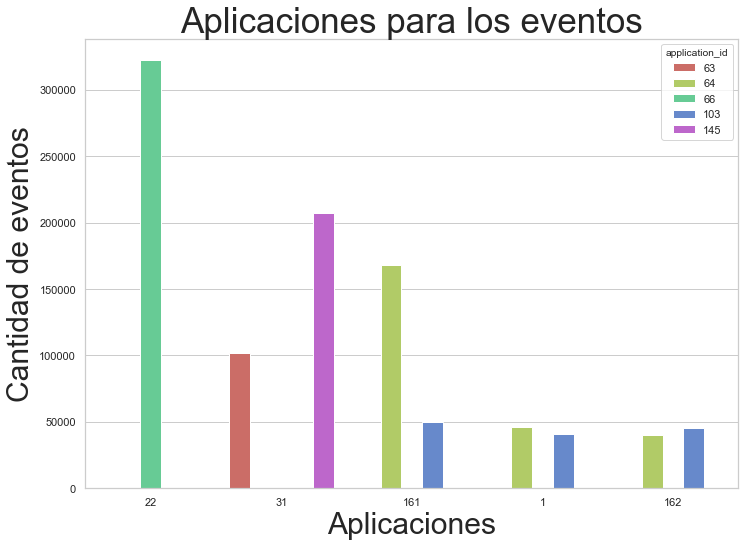

In [10]:
#66     325696
#64     259084
#145    252431
#63     181555
#103    137513
eventos_relevantes = list([66,64,145,63,103])
events_max5 = events[events['application_id'].isin(eventos_relevantes)]
events_max5['application_id'].value_counts()
events_max5['event_id'].value_counts()
#22     322334
#31     309187
#161    217846
#1       86749
#162     84898
eventosid_relevantes = list([22,31,161,1,162])
events_max5 = events_max5[events_max5['event_id'].isin(eventosid_relevantes)]
events_max5['event_id'].value_counts()
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="event_id", hue="application_id", data=events_max5, palette="hls", order=[22,31,161,1,162])
g.set_title("Aplicaciones para los eventos", fontsize=35)
g.set_xlabel("Aplicaciones", fontsize=30)
g.set_ylabel("Cantidad de eventos", fontsize=30)

Text(81.8,0.5,'Horario')

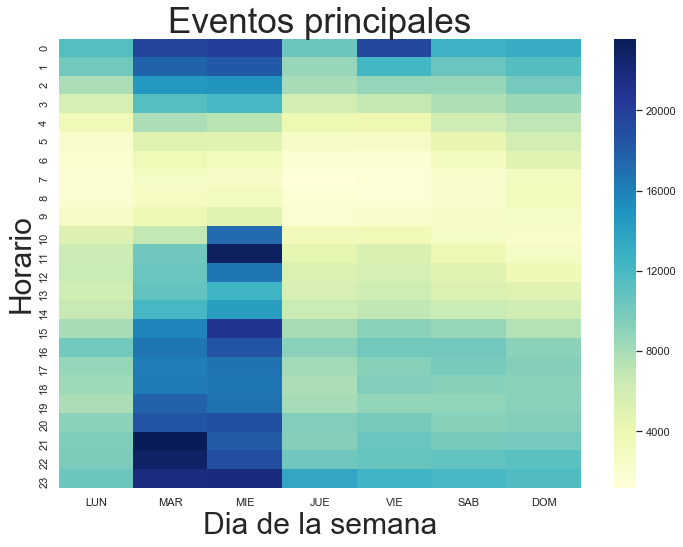

In [11]:
eventosid_relevantes = list([22,31,161,1,162])
df_heat = events[events["event_id"].isin(eventosid_relevantes)].groupby(["hora", "nombre_dia"])["event_id"].size().reset_index()
df_heat['nombre_dia'] = pd.Categorical(df_heat['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])

df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
df_heat.sortlevel(level=0, inplace=True)

for_heatmap = df_heat.pivot_table(index='hora', columns='nombre_dia', values='event_id', aggfunc='sum')
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Eventos principales", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)

Text(81.8,0.5,'Horario')

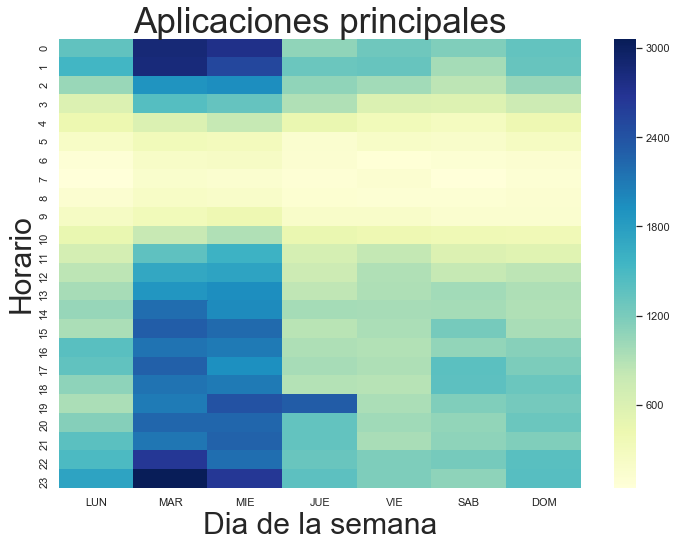

In [12]:
aplicaciones_relevantes = list([7,9,10,16,8])
events_top = events[events['application_id'].isin(aplicaciones_relevantes)]

df_heat = events_top.groupby(["hora", "nombre_dia"])["application_id"].size().reset_index()
df_heat['nombre_dia'] = pd.Categorical(df_heat['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])

df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
df_heat.sortlevel(level=0, inplace=True)

for_heatmap = df_heat.pivot_table(index='hora', columns='nombre_dia', values='application_id', aggfunc='sum')

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Aplicaciones principales", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)

Text(27.3348,0.5,'Cantidad')

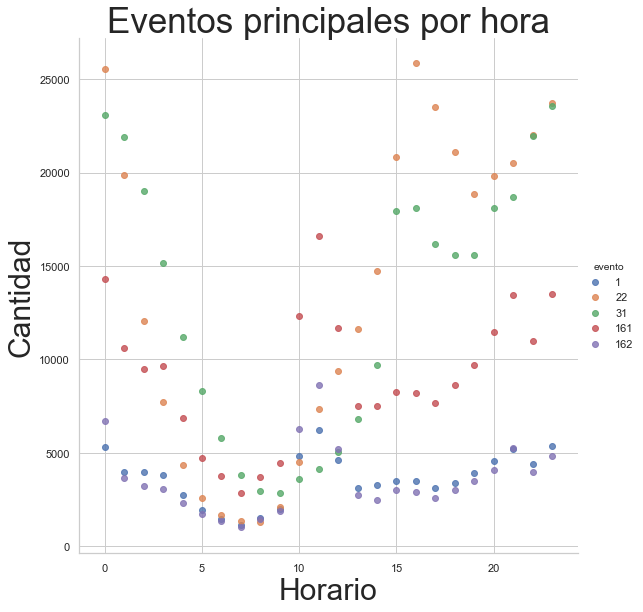

In [32]:
crecimiento_eventos = events_max5.groupby(['event_id','hora']).count()[['date']].reset_index()
crecimiento_eventos['evento'] = crecimiento_eventos['event_id']
sns.lmplot(x='hora', y='date', hue='evento', data=crecimiento_eventos, fit_reg=False, size=8)
ax = plt.gca()
ax.set_title("Eventos principales por hora", fontsize=35)
ax.set_xlabel("Horario",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

In [6]:
################################################################
## CLICKS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
clicks = pd.read_csv('../../clicks.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (CLICKS)
clicks['created'] = pd.to_datetime(clicks['created'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
clicks['mes'] = clicks['created'].dt.month
clicks['dia'] = clicks['created'].dt.day
clicks['hora'] = clicks['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
clicks['nombre_dia'] = clicks['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
clicks.loc[clicks.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
clicks.loc[clicks.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
clicks.loc[clicks.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
clicks.loc[clicks.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
clicks.loc[clicks.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
clicks.loc[clicks.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
clicks.loc[clicks.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
clicks['nombre_mes'] = ''
clicks.loc[clicks.mes == 1, 'nombre_mes'] = 'ENERO'
clicks.loc[clicks.mes == 2, 'nombre_mes'] = 'FEBRERO'
clicks.loc[clicks.mes == 3, 'nombre_mes'] = 'MARZO'
clicks.loc[clicks.mes == 4, 'nombre_mes'] = 'ABRIL'
clicks.loc[clicks.mes == 5, 'nombre_mes'] = 'MAYO'
clicks.loc[clicks.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
clicks['hora_madrugada'] = 0
clicks.loc[((clicks.hora > -1) & (clicks.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
clicks['hora_maniana'] = 0
clicks.loc[((clicks.hora > 6) & (clicks.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
clicks['hora_almuerzo'] = 0
clicks.loc[((clicks.hora > 11) & (clicks.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
clicks['hora_tarde'] = 0
clicks.loc[((clicks.hora > 13) & (clicks.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
clicks['hora_noche'] = 0
clicks.loc[((clicks.hora > 18) & (clicks.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
clicks['nombre_dia'] = clicks['nombre_dia'].astype('category')
clicks['nombre_mes'] = clicks['nombre_mes'].astype('category')
################################################################
################################################################

In [7]:
clicks['wifi_connection'].value_counts()

False    26351
Name: wifi_connection, dtype: int64

In [8]:
clicks['source_id'].value_counts()
source_relevantes = list([0,1,6,5,2])
clicks_top = clicks[clicks['source_id'].isin(source_relevantes)]
clicks_top['source_id'].value_counts()
clicks_top = clicks_top[clicks_top['touchX'].notnull()]
clicks_top = clicks_top[clicks_top['touchY'].notnull()]

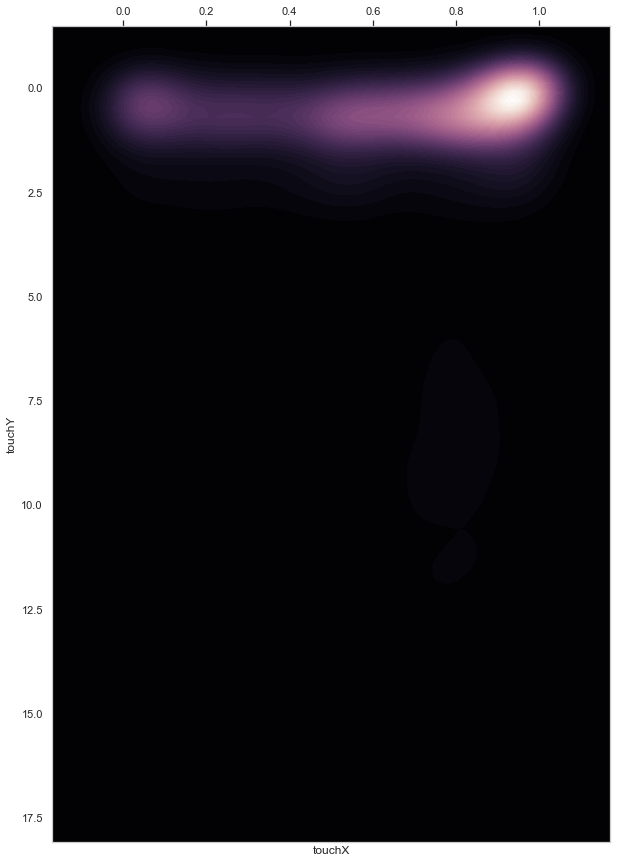

In [9]:
f, ax = plt.subplots(figsize=(10, 15))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
ax.invert_yaxis()
ax.xaxis.set_ticks_position('top')
sns.kdeplot(clicks_top.touchX, clicks_top.touchY, cmap=cmap, n_levels=60, shade=True)

Text(0,0.5,'Cantidad')

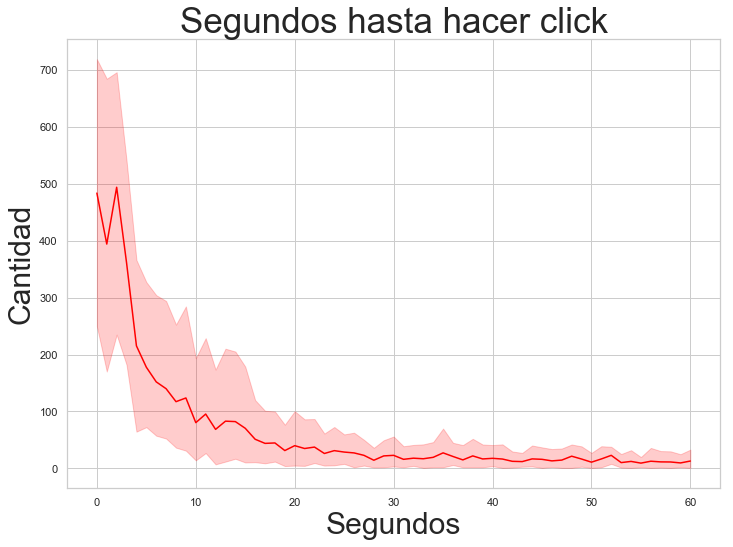

In [15]:
clicks['timeToClick'].value_counts()
clicks_group = clicks.groupby('timeToClick').count()[['advertiser_id']].reset_index()

clicks['secondsToClick'] = np.floor(clicks['timeToClick'])
clicks = clicks[clicks['secondsToClick'] < 61.0]
clicks['secondsToClick'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

clicksASD = clicks.groupby(['source_id','secondsToClick']).count()[['advertiser_id']].reset_index()
sns.lineplot(x="secondsToClick", y="advertiser_id", data=clicksASD, color='red')
ax = plt.gca()
ax.set_title("Segundos hasta hacer click", fontsize=35)
ax.set_xlabel("Segundos",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

In [34]:
################################################################
## INSTALLS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
installs = pd.read_csv('../../installs.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (INSTALLS)
installs['kind'] = installs['kind'].astype('category')
installs['user_agent'] = installs['user_agent'].astype('category')
installs['session_user_agent'] = installs['session_user_agent'].astype('category')
installs['created'] = pd.to_datetime(installs['created'], infer_datetime_format=True)
installs['trans_id'] = installs['trans_id'].astype('category')
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
installs['mes'] = installs['created'].dt.month
installs['dia'] = installs['created'].dt.day
installs['hora'] = installs['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
installs['nombre_dia'] = installs['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
installs.loc[installs.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
installs.loc[installs.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
installs.loc[installs.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
installs.loc[installs.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
installs.loc[installs.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
installs.loc[installs.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
installs.loc[installs.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
installs['nombre_mes'] = ''
installs.loc[installs.mes == 1, 'nombre_mes'] = 'ENERO'
installs.loc[installs.mes == 2, 'nombre_mes'] = 'FEBRERO'
installs.loc[installs.mes == 3, 'nombre_mes'] = 'MARZO'
installs.loc[installs.mes == 4, 'nombre_mes'] = 'ABRIL'
installs.loc[installs.mes == 5, 'nombre_mes'] = 'MAYO'
installs.loc[installs.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
installs['hora_madrugada'] = 0
installs.loc[((installs.hora > -1) & (installs.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
installs['hora_maniana'] = 0
installs.loc[((installs.hora > 6) & (installs.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
installs['hora_almuerzo'] = 0
installs.loc[((installs.hora > 11) & (installs.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
installs['hora_tarde'] = 0
installs.loc[((installs.hora > 13) & (installs.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
installs['hora_noche'] = 0
installs.loc[((installs.hora > 18) & (installs.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
installs['nombre_dia'] = installs['nombre_dia'].astype('category')
installs['nombre_mes'] = installs['nombre_mes'].astype('category')
################################################################
################################################################

In [38]:
installs['wifi'].value_counts()

True     1377
False     352
Name: wifi, dtype: int64

In [39]:
installs_hora_madrugada = installs[installs['hora_madrugada'] == 1]
installs_hora_maniana = installs[installs['hora_maniana'] == 1]
installs_hora_almuerzo = installs[installs['hora_almuerzo'] == 1]
installs_hora_tarde = installs[installs['hora_tarde'] == 1]
installs_hora_noche = installs[installs['hora_noche'] == 1]

In [40]:
installs_top5 = installs[((installs['application_id'] == 7) | (installs['application_id'] == 9) | (installs['application_id'] == 10) | (installs['application_id'] == 16) | (installs['application_id'] == 8))]
installs_top5.head()
crecimiento_installs_dleng = installs_top5.groupby(['device_language']).count()[['attributed']].reset_index()
crecimiento_installs_dleng = crecimiento_installs_dleng[crecimiento_installs_dleng['attributed'] >200]
crecimiento_installs_dleng
installs_top5['implicit'].value_counts()

False    2052
True      705
Name: implicit, dtype: int64

Text(25.2001,0.5,'Cantidad')

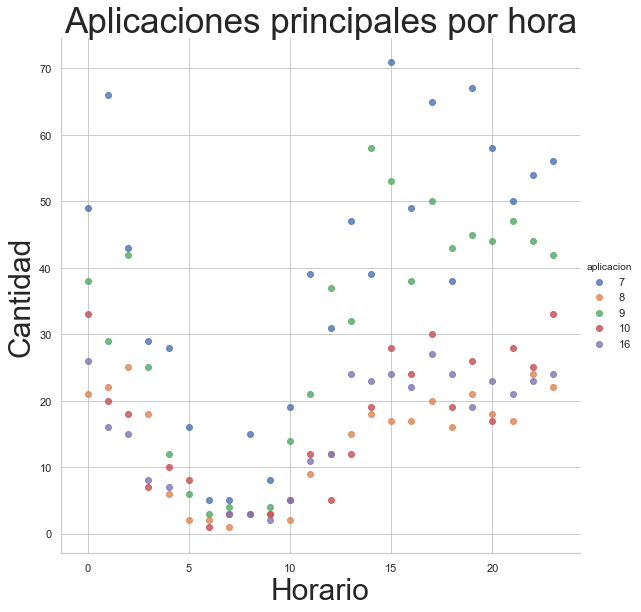

In [41]:
crecimiento_installs = installs_top5.groupby(['application_id','hora']).count()[['attributed']].reset_index()
crecimiento_installs['aplicacion'] = crecimiento_installs['application_id']
sns.lmplot(x='hora', y='attributed', hue='aplicacion', data=crecimiento_installs, fit_reg=False, size=8)
ax = plt.gca()
ax.set_title("Aplicaciones principales por hora", fontsize=35)
ax.set_xlabel("Horario",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

In [16]:
## OBTENEMOS AQUELLOS EVENTOS QUE TIENEN UN NABVEGADOR ASIGNADOS.
si_implicit = installs_top5[installs_top5['implicit'] == True]
no_implicit = installs_top5[installs_top5['implicit'] != True]
## SOLO HA BASRTADO DIFERENCIARLOS EN CHROME O EN OTROS PUESTO QUE LOS DEMÁS SON DESPRECIABLES.
sizes = [si_implicit.implicit.count(), no_implicit.implicit.count()]
nombres = ['SI', 'NO']
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Implicit for top installed apps', fontsize=35)
patches, texts, autotexts = plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
texts[0].set_fontsize(4)
plt.show()

NameError: name 'installs_top5' is not defined

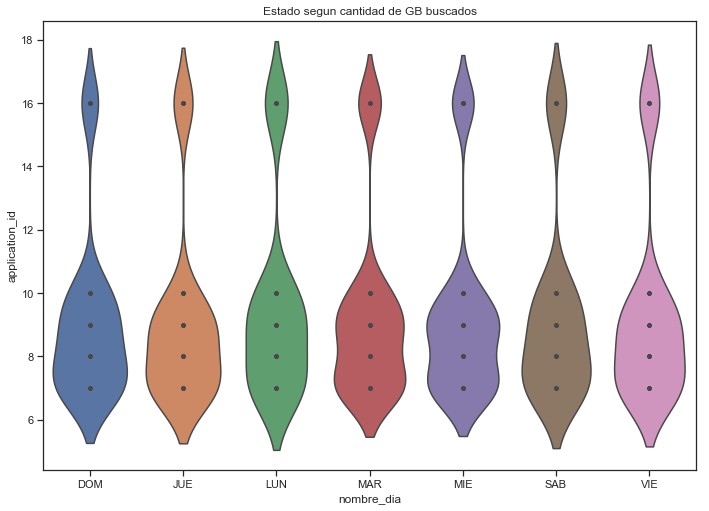

In [53]:
## data6 = installs_filtrados[installs_filtrados['device_language'] == 3.301378e+18]
## data6.head()
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="nombre_dia", y="application_id", data=installs_top5, inner="points", ax=ax).set_title("Estado segun cantidad de GB buscados")
plt.show()    

In [15]:
################################################################
## AUCTIONS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
auctions = pd.read_csv('../../auctions.csv',nrows=5000000)
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (AUCTIONS)
auctions['date'] = pd.to_datetime(auctions['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
auctions['mes'] = auctions['date'].dt.month
auctions['dia'] = auctions['date'].dt.day
auctions['hora'] = auctions['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
auctions['nombre_dia'] = auctions['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
auctions.loc[auctions.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
auctions.loc[auctions.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
auctions.loc[auctions.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
auctions.loc[auctions.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
auctions.loc[auctions.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
auctions.loc[auctions.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
auctions.loc[auctions.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
auctions['nombre_mes'] = ''
auctions.loc[auctions.mes == 1, 'nombre_mes'] = 'ENERO'
auctions.loc[auctions.mes == 2, 'nombre_mes'] = 'FEBRERO'
auctions.loc[auctions.mes == 3, 'nombre_mes'] = 'MARZO'
auctions.loc[auctions.mes == 4, 'nombre_mes'] = 'ABRIL'
auctions.loc[auctions.mes == 5, 'nombre_mes'] = 'MAYO'
auctions.loc[auctions.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
auctions['hora_madrugada'] = 0
auctions.loc[((auctions.hora > -1) & (auctions.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
auctions['hora_maniana'] = 0
auctions.loc[((auctions.hora > 6) & (auctions.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
auctions['hora_almuerzo'] = 0
auctions.loc[((auctions.hora > 11) & (auctions.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
auctions['hora_tarde'] = 0
auctions.loc[((auctions.hora > 13) & (auctions.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
auctions['hora_noche'] = 0
auctions.loc[((auctions.hora > 18) & (auctions.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
auctions['nombre_dia'] = auctions['nombre_dia'].astype('category')
auctions['nombre_mes'] = auctions['nombre_mes'].astype('category')
################################################################
################################################################

In [16]:
################################################################
## EJEMPLO DE MERGE.
################################################################
## pd.merge(eventos_por_usuario, y_train, on='trans_id', how='inner')
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 17 columns):
auction_type_id    float64
country            int64
date               datetime64[ns]
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
mes                int64
dia                int64
hora               int64
nombre_dia         category
nombre_mes         category
hora_madrugada     int64
hora_maniana       int64
hora_almuerzo      int64
hora_tarde         int64
hora_noche         int64
dtypes: category(2), datetime64[ns](1), float64(1), int64(13)
memory usage: 581.7 MB


In [38]:
def top_value_count(x, n=5): return x.value_counts().head(n)